<a href="https://colab.research.google.com/github/sharmaweb/Machine-Learnig-and-Data-Science/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



In [ ]:
#reading data from web
df = web.DataReader("AAPL", "yahoo", start=datetime(2012, 1, 1),
                     end=datetime(2020, 12, 17))
df

In [ ]:
#Get the dimensions of the data
df.shape

In [ ]:
#plot the graph of closing price history
plt.figure(figsize=(16,8))
plt.title('Closing')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price of stock USD($)')
plt.show()

In [ ]:
#create a new dataset with only close column
data=df.filter(['Close'])
#Convert the dataset into a numpy array
dataset=data.values
#Get the number of rows to train 
train_rows_number= math.ceil(len(dataset)* 0.8) #Since we will use 80% of the data for training
train_rows_number
dataset


array([[ 14.6867857 ],
       [ 14.76571369],
       [ 14.92964268],
       ...,
       [127.87999725],
       [127.80999756],
       [128.69999695]])

In [ ]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.0061488 ],
       [0.00680526],
       [0.00816869],
       ...,
       [0.94760156],
       [0.94701935],
       [0.95442167]])

In [ ]:
#Create a training data set
#Create the scaled training data set
train_data=scaled_data[0:train_rows_number, :]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  #Every 60th value is stored in y_train

In [ ]:
#Convet the x_train and y_train into nparrys
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
#Since the LSTM mode expects a three dimensional input we are going to reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1745, 60, 1)

In [ ]:
#Bulid the model
model=Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1], 1) )) # return_sequence is true because we are going to add more LSTM layes , input shape is (60,1) see the above cell 
model.add(LSTM(50, return_sequences=False)) #return_sequence is false because we are not going to add any more LSTM layers ... input_shape is specified only in first layer
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train 
model.fit(x_train,y_train , batch_size=1,epochs=1)

1745/1745 [==============================] - 43s 23ms/step - loss: 5.7218e-04


In [ ]:
#create the testing data set
#Create a new array containing scaled value from  index 1543 to 2003
test_data=scaled_data[train_rows_number-60: , :]
#create x_test and y_test
x_test=[]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
y_test= dataset[train_rows_number:, :]
#Our pediction should be similar to y_test
x_test

In [ ]:
#Convert the data into np array and reshape
x_test=np.array(x_test)
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

array([[ 42.22553 ],
       [ 42.160957],
       [ 42.24306 ],
       [ 42.448822],
       [ 42.721226],
       [ 43.05241 ],
       [ 43.439754],
       [ 43.861893],
       [ 44.212902],
       [ 44.525383],
       [ 44.9609  ],
       [ 45.302433],
       [ 45.490917],
       [ 45.518764],
       [ 45.49715 ],
       [ 45.45505 ],
       [ 45.438946],
       [ 45.473263],
       [ 45.605705],
       [ 45.812275],
       [ 46.04523 ],
       [ 46.300602],
       [ 46.6203  ],
       [ 46.92047 ],
       [ 47.204273],
       [ 47.399284],
       [ 47.51947 ],
       [ 47.592087],
       [ 47.629063],
       [ 47.74508 ],
       [ 47.908787],
       [ 48.09782 ],
       [ 48.357418],
       [ 48.615288],
       [ 48.791367],
       [ 48.87504 ],
       [ 48.90505 ],
       [ 48.794926],
       [ 48.88596 ],
       [ 49.03547 ],
       [ 49.272343],
       [ 49.440716],
       [ 49.402046],
       [ 49.256092],
       [ 49.00781 ],
       [ 48.638386],
       [ 47.94145 ],
       [ 47.2

In [ ]:
#Get the root mean squared error(RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse=math.sqrt(mse)
# rmse=np.sqrt(np.mean((predictions - y_test)**2))
rmse

8.506508114331103

the lower the rmse the better zero is considered as perfections

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


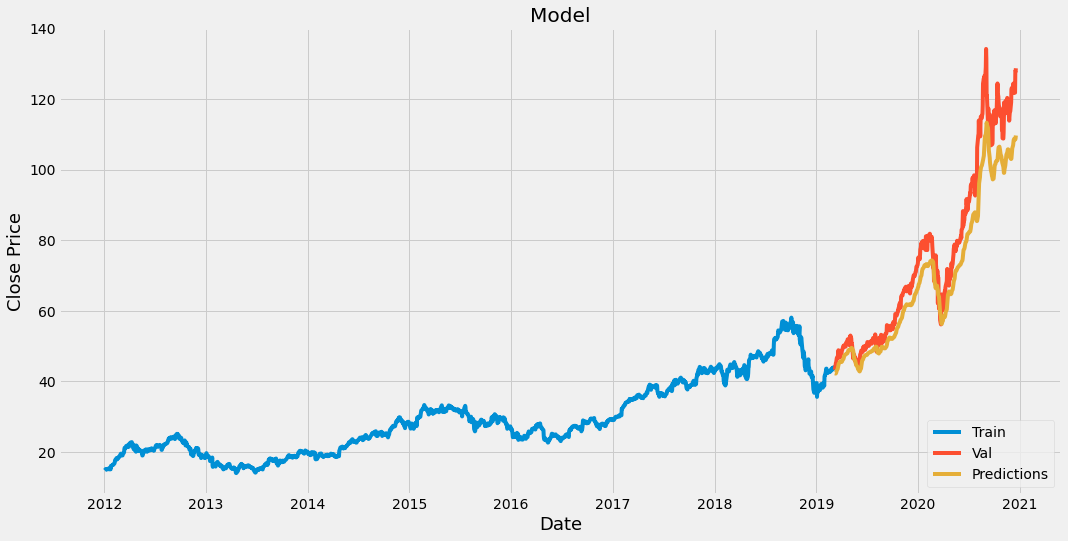

In [ ]:
#Plot the data
train=data[:train_rows_number]
valid=data[train_rows_number:]
valid['Predictions']=predictions # Giving valid another column and setting it equal to prediction
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the actual and predicted prices
valid

,Close,Predictions
Date,,
2019-03-08,43.227501,42.225529
2019-03-11,44.724998,42.160957
2019-03-12,45.227501,42.243061
2019-03-13,45.427502,42.448822
2019-03-14,45.932499,42.721226
...,...,...
2020-12-11,122.410004,108.739914
2020-12-14,121.779999,108.710159
2020-12-15,127.879997,108.508438


In [ ]:
#Get the quote
data_quote=web.DataReader('AAPL', data_source='yahoo', start=datetime(2012,1,1), end=datetime(2019,12,17))
#Create a new data frame
new_df=data_quote.filter(['Close'])
#Get last 60 day closing price values 
last_60_days=new_df[-60:]
# convert dataframe into an array
last_60_days=last_60_days.values
#Scale the data
last_60_days_scaled=scaler.transform(last_60_days)
#Create an empty list and append the scaled values in it
X_test=[]
X_test.append(last_60_days_scaled)
#Convert into a np array
X_test=np.array(X_test)
#reshape the array to train on LSTM
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predictions
pred_price=model.predict(X_test);
#Get the unscaled predictions
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[63.77385]]


In [ ]:
data_quote2=web.DataReader('AAPL', data_source='yahoo', start=datetime(2019,12,18), end=datetime(2019,12,18))
data_quote2['Close']

Date
2019-12-18    69.934998
Name: Close, dtype: float64